# Import Library yang Digunakan

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Wrangling

## Gathering Data

In [19]:
raw_data_path = os.path.join(os.getcwd(), '..', 'data', 'raw_data.csv')

In [20]:
df = pd.read_csv(raw_data_path)
df.head()

,unit_name,bedroom,bathroom,beds,guests,type,unit_id,wifi,tv,cable_tv,...,room_name,booking_received_timestamp,booking_check_in,booking_check_out,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
0,Apartment - 1 Lantai 1,1,1.0,1.0,2.0,Bingin Ombak Apartment - 1 Lantai 1,UN1539,1,0,0,...,Bingin Ombak Apartment - 1 Lantai 1,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
1,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
2,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
3,Standard 2,1,2.0,1.0,2.0,Standard,UN1536,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
4,Standard 1,1,2.0,1.0,2.0,Standard,UN0165,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06


In [21]:
print("Dataset Bukit Vista memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bukit Vista memiliki 78010 baris dan 47 kolom


## Assesing Data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78010 entries, 0 to 78009
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_name                   78010 non-null  object 
 1   bedroom                     78010 non-null  int64  
 2   bathroom                    77920 non-null  float64
 3   beds                        77920 non-null  float64
 4   guests                      77920 non-null  float64
 5   type                        78010 non-null  object 
 6   unit_id                     78010 non-null  object 
 7   wifi                        78010 non-null  int64  
 8   tv                          78010 non-null  int64  
 9   cable_tv                    78010 non-null  int64  
 10  ac                          78010 non-null  int64  
 11  workspace                   78010 non-null  int64  
 12  essentials                  78010 non-null  int64  
 13  hot_water                   780

In [23]:
print('Jumlah missing value pada tiap kolom:')
df.isnull().sum()

Jumlah missing value pada tiap kolom:


unit_name                         0
bedroom                           0
bathroom                         90
beds                             90
guests                           90
type                              0
unit_id                           0
wifi                              0
tv                                0
cable_tv                          0
ac                                0
workspace                         0
essentials                        0
hot_water                         0
parking                           0
pool                              0
gym                               0
private_entrance                  0
luggage_drop_off                  0
hanger                            0
lock                              0
linens                            0
garden                            0
balcony                           0
kitchen                           0
breakfast                         0
heating                           0
washer                      

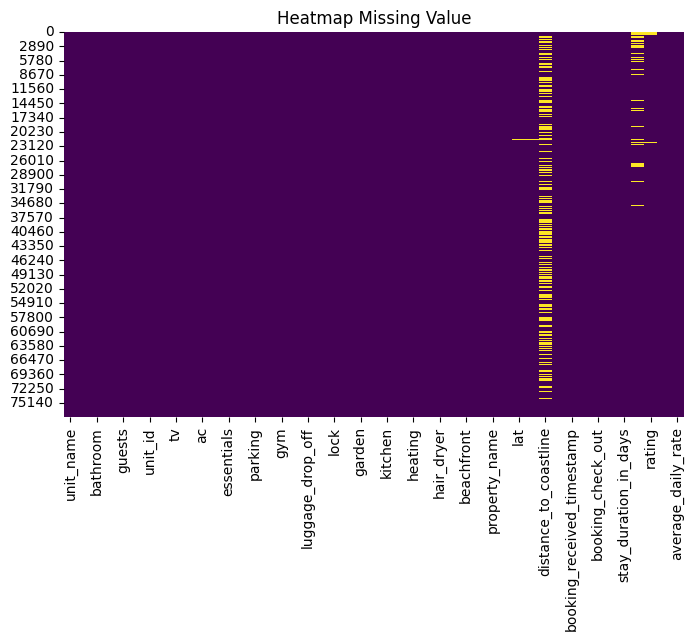

In [24]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [25]:
df.describe()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,essentials,...,property_bedrooms,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
count,78010.000000,77920.000000,77920.000000,77920.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.0,...,78010.000000,77816.000000,77816.000000,45343.000000,78010.000000,78010.000000,72671.000000,77230.000000,7.801000e+04,7.801000e+04
mean,1.035137,1.054864,1.047857,2.086679,0.978823,0.532265,0.089796,0.974696,0.899282,1.0,...,13.234765,-8.761119,115.146185,670.379297,28.425099,3.539892,0.631665,4.404959,2.296312e+06,6.777725e+05
std,0.306131,0.383144,0.324730,0.522380,0.143974,0.498961,0.285891,0.157049,0.300957,0.0,...,7.730403,0.103751,0.388802,1414.130566,40.994812,3.830646,0.487256,0.942341,2.977614e+06,6.287251e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.000000,-8.837896,110.360967,12.924400,-1.000000,1.000000,-1.000000,1.000000,-2.590644e+06,-2.590644e+06
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,6.000000,-8.822391,115.087110,65.860300,2.000000,2.000000,0.600000,4.000000,8.501970e+05,3.801168e+05
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,13.000000,-8.809038,115.113060,402.195000,12.000000,3.000000,0.900000,5.000000,1.463267e+06,5.001512e+05
75%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,22.000000,-8.678881,115.133906,761.362000,37.000000,4.000000,0.900000,5.000000,2.700462e+06,7.801720e+05
max,5.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,27.000000,-7.728722,115.586846,14402.100000,333.000000,91.000000,1.000000,5.000000,6.137459e+07,1.003399e+07


In [26]:
for column_name in df.columns:
    # Get distinct values for each column
    distinct_values = df[column_name].unique()
    
    # Print column name and distinct values
    print("Column Name:", column_name)
    print("Distinct Values:", distinct_values, "\n")

Column Name: unit_name
Distinct Values: ['Apartment - 1 Lantai 1' 'Apartment - 2 Lantai 2' 'Standard 2'
 'Standard 1' 'Standard 3' 'Standard 4' 'Room 06 (Downstairs)'
 'Room 05 (Downstairs)' 'Room 10 (Upstairs)' 'Room 09 (Upstairs)'
 'Room 08 (Upstairs)' 'Room 04 (Downstairs)' 'Room 07 (Downstairs)'
 'Me Villa A' 'E' 'C' 'B' 'D' 'Room 01' 'Room 04' 'Room 12' 'Room 11'
 'Room 03' 'Room 09' 'Room 10' 'Room 02' 'Room 05' '224' '220' '101' '219'
 '222' '214' '215' '216' '218' '221' '217' '105' '106' '107' '104'
 'Standard 4A' 'Standard 3A' 'Bungalow 2' 'Bungalow 3' 'Bungalow 4'
 'Bungalow 1' 'Room 4' 'Room 1' 'Unit 5 (Upstairs)' 'Unit 4 (Upstairs)'
 'Unit 3 (Upstairs)' 'Unit 2 (Downstairs)' 'Unit 1 (Downstairs)'
 'Bungalow 5' 'Wooden 103' 'Pondok Lulik - Wooden 102 #T'
 'Room 08 Downstairs' 'Room 07 Downstairs' 'Room 19' 'Room 18'
 'Room 09 Downstairs' 'Room 10 Downstairs' 'Room 16 Upstairs' 'Room 20'
 'Room 21' 'Room 22' 'Room 23' 'Guesthouse 3' 'Guesthouse 2'
 'Guesthouse 1' 'Guesthouse 

In [27]:
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 17259


## Cleaning Data

In [28]:
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()

columns_to_impute = ['bathroom', 
                     'beds', 
                     'guests', 
                     'lat', 
                     'lng', 
                     'distance_to_coastline', 
                     'review_sentiment_score', 
                     'rating']

# Perform imputation only on selected columns
imputed_values = mice_imputer.fit_transform(df[columns_to_impute])

# Create a DataFrame from imputed values
imputed_df = pd.DataFrame(imputed_values, columns=columns_to_impute)

# Replace original columns with imputed values
df[columns_to_impute] = imputed_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [29]:
# for column in df.columns:
#     # Check if the column is numeric
#     if df[column].dtype in ['int64', 'float64']:
#         # Calculate the mean of the column, ignoring NaN values
#         mean_value = df[column].mean()
#         # Fill NaN values in the column with the mean
#         df[column].fillna(mean_value, inplace=True)

In [30]:
# Convert float columns to int
df['bathroom'] = df['bathroom'].astype(int)
df['beds'] = df['beds'].astype(int)
df['guests'] = df['guests'].astype(int)

# Convert object columns to datetime
df['booking_received_timestamp'] = pd.to_datetime(df['booking_received_timestamp'])
df['booking_check_in'] = pd.to_datetime(df['booking_check_in'])
df['booking_check_out'] = pd.to_datetime(df['booking_check_out'])

In [31]:
# List of column names to drop
columns_to_drop = ['unit_name',
                   'type',
                   'unit_id', 
                   'essentials', 
                   'property_bedrooms',
                   'booking_received_timestamp',
                   'booking_check_in',
                   'booking_check_out']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [32]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 0


In [33]:
print("Dataset Bukit Vista setelah preprocessing memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bukit Vista setelah preprocessing memiliki 50728 baris dan 39 kolom


## Exploratory Data Analysis

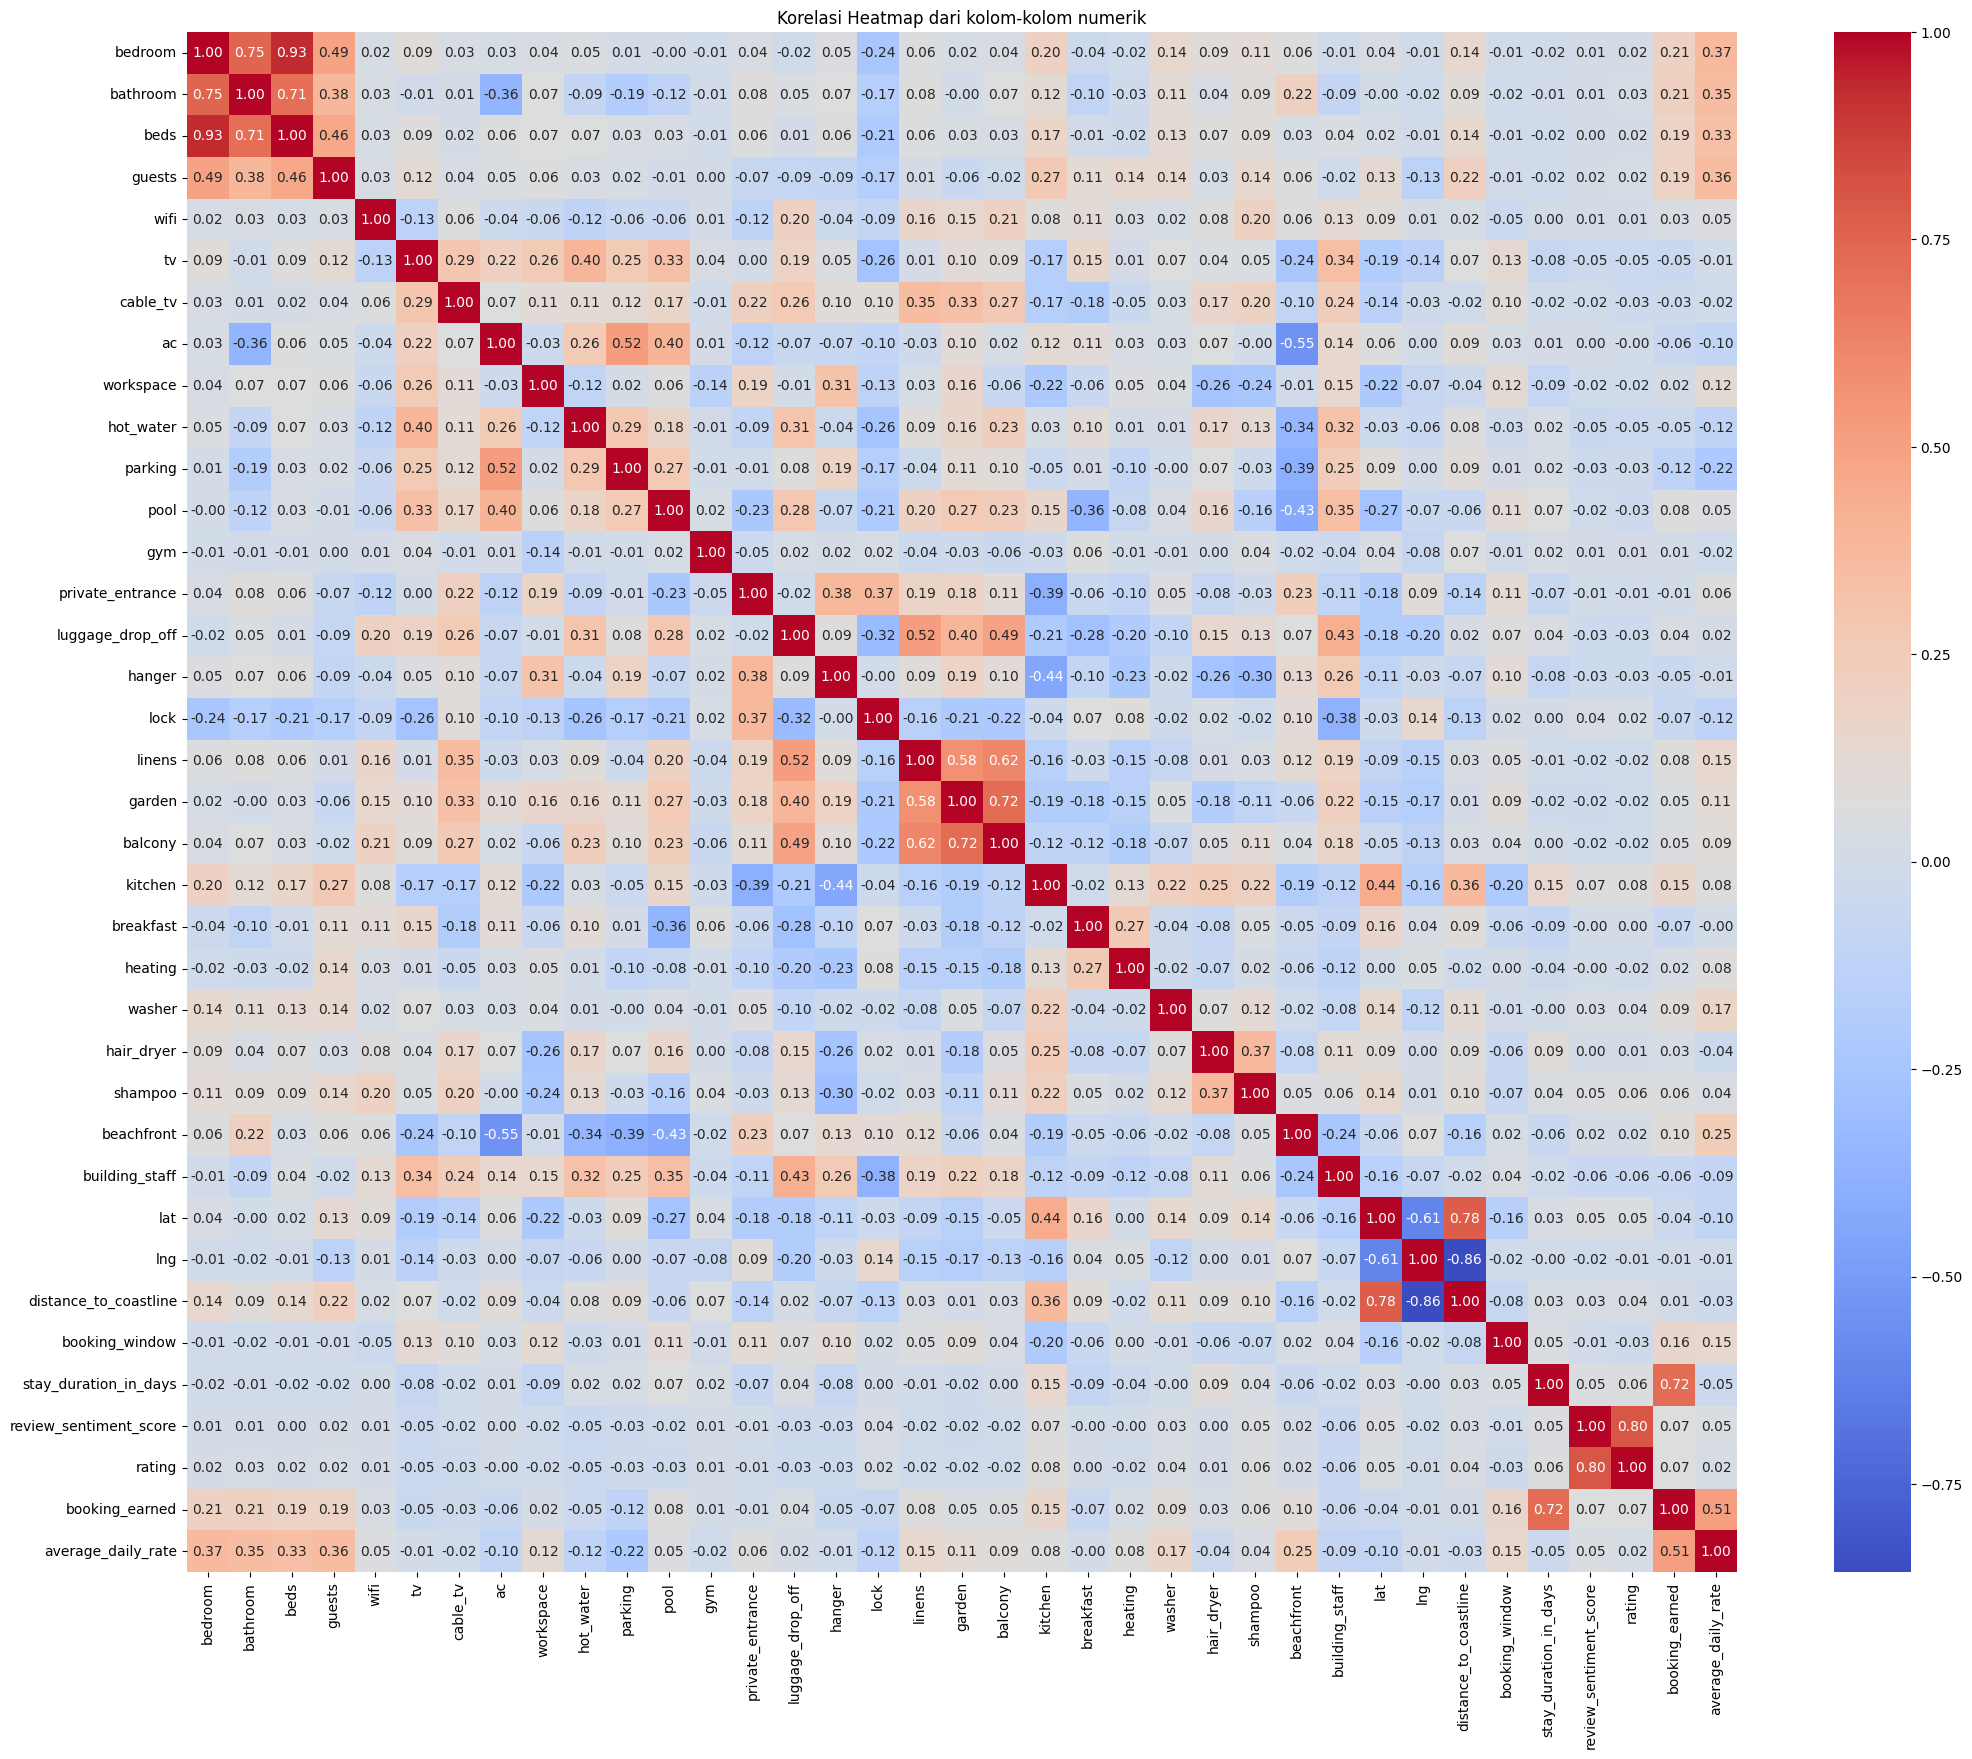

In [35]:
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(25,20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik')
plt.show()

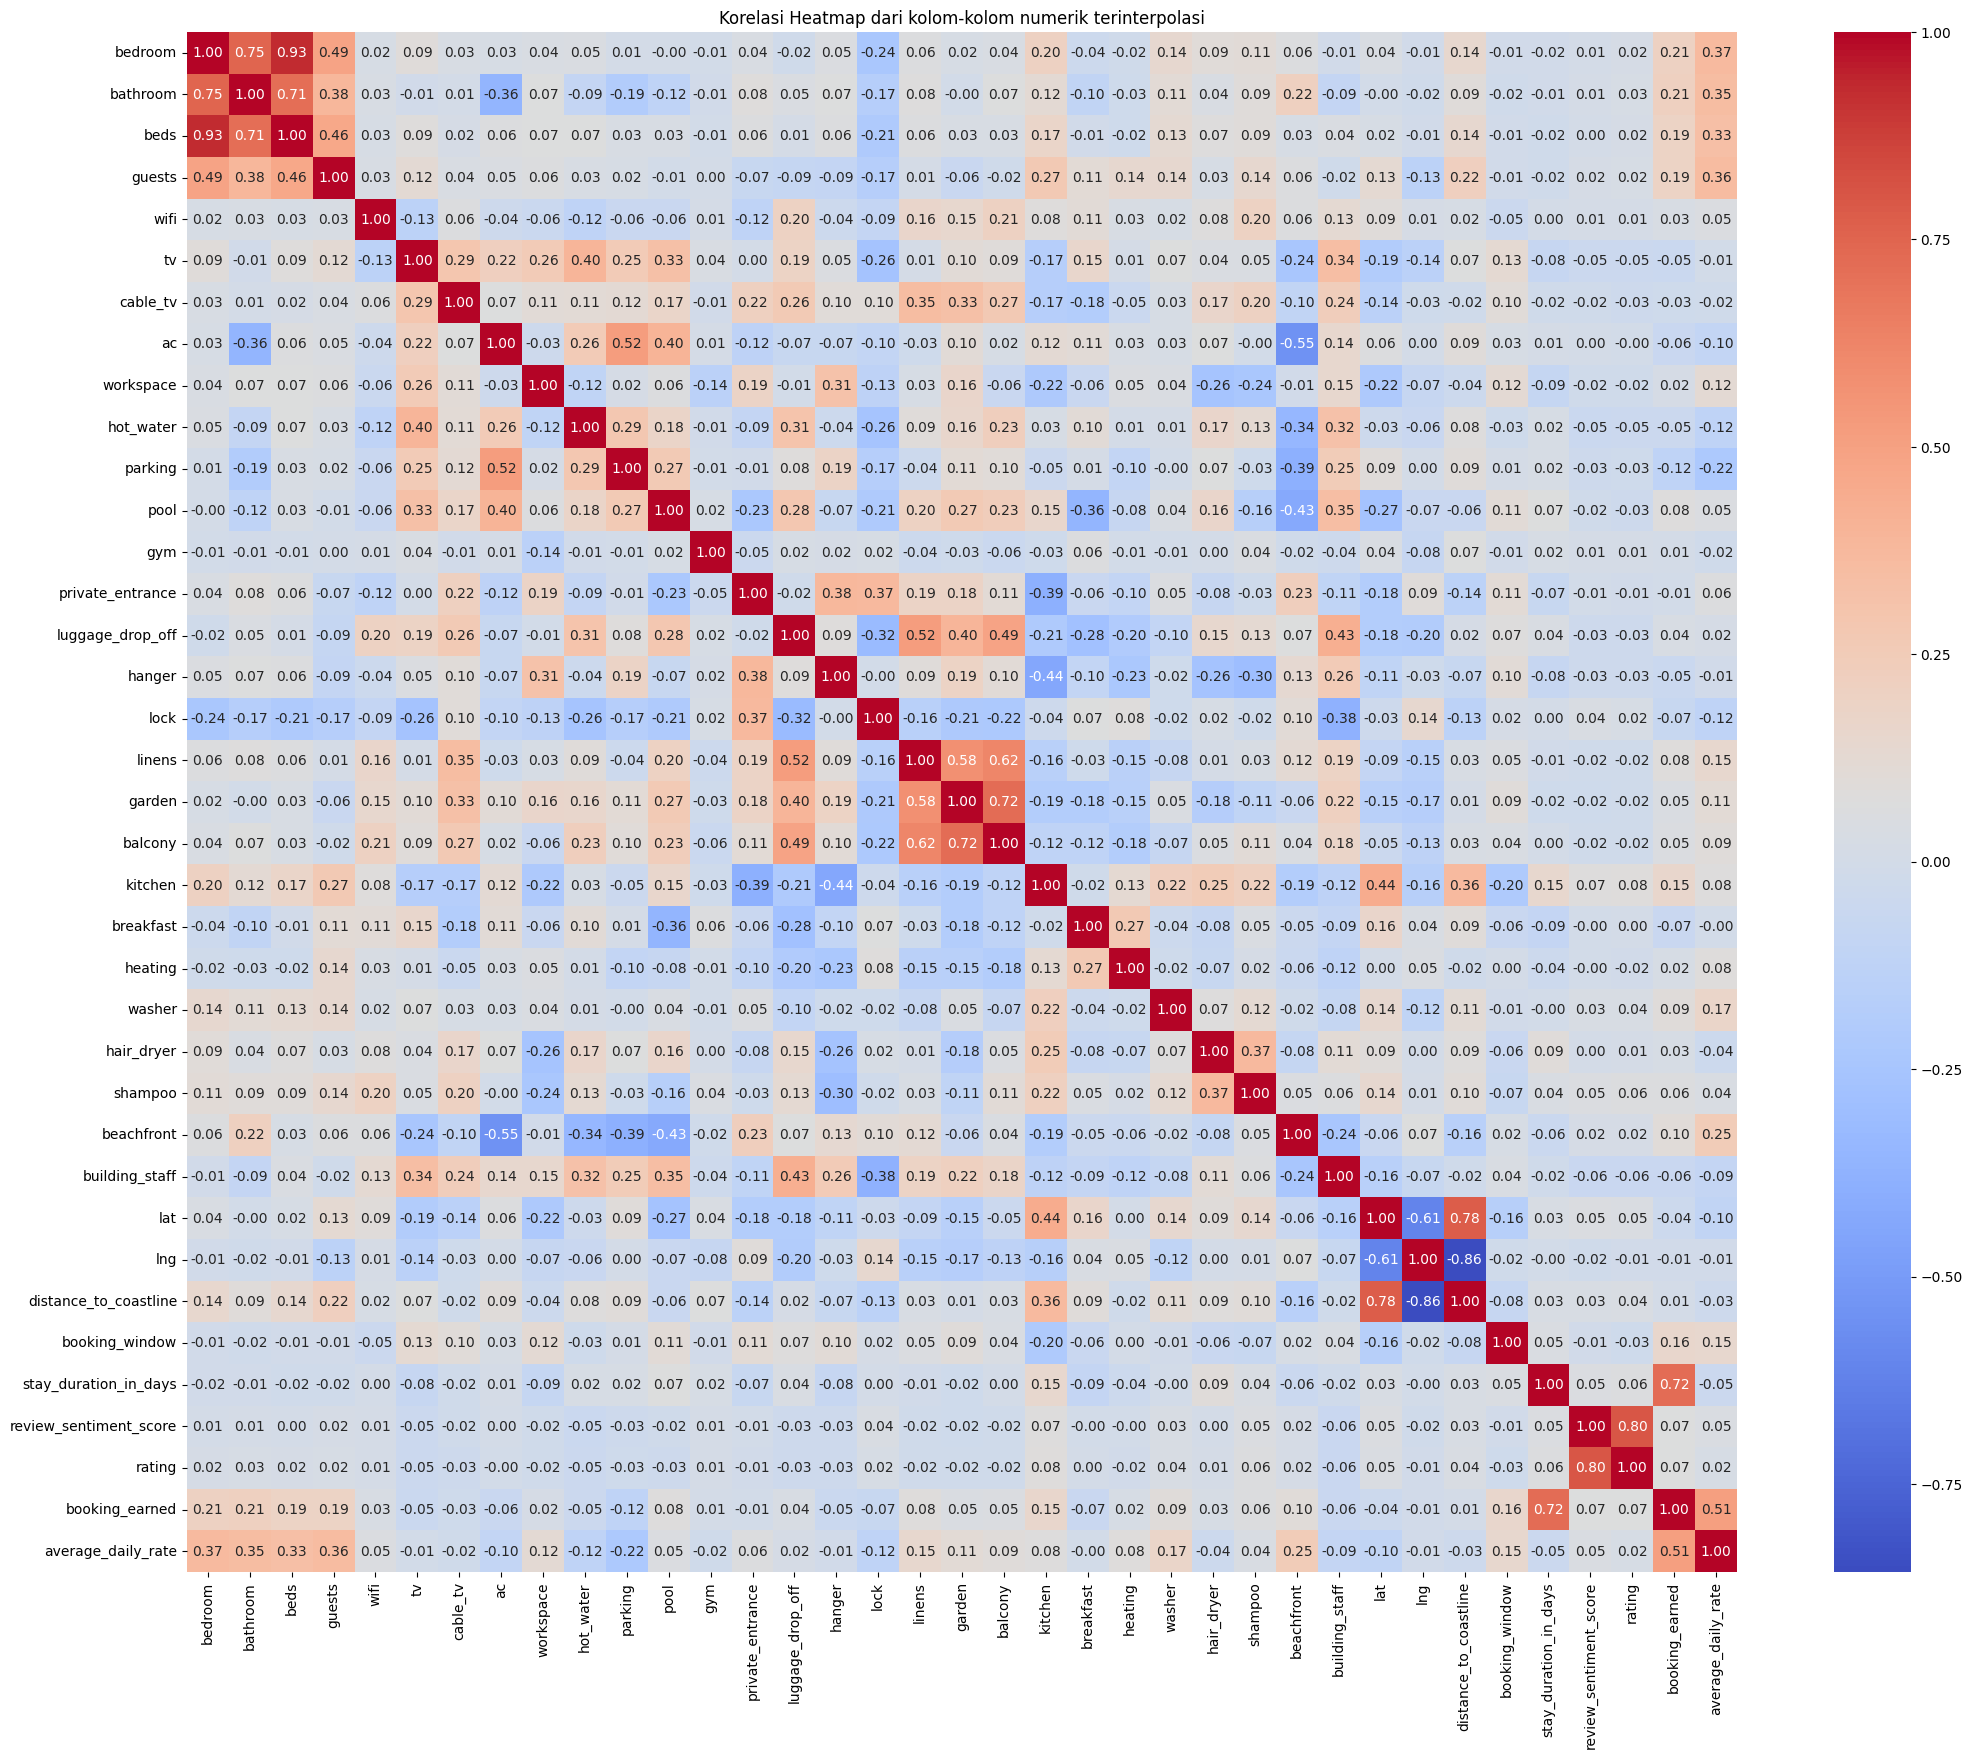

In [36]:
df_interpolated = numeric_columns.interpolate(method='polynomial', order=2)

plt.figure(figsize=(25,20))
sns.heatmap(df_interpolated.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik terinterpolasi')
plt.show()

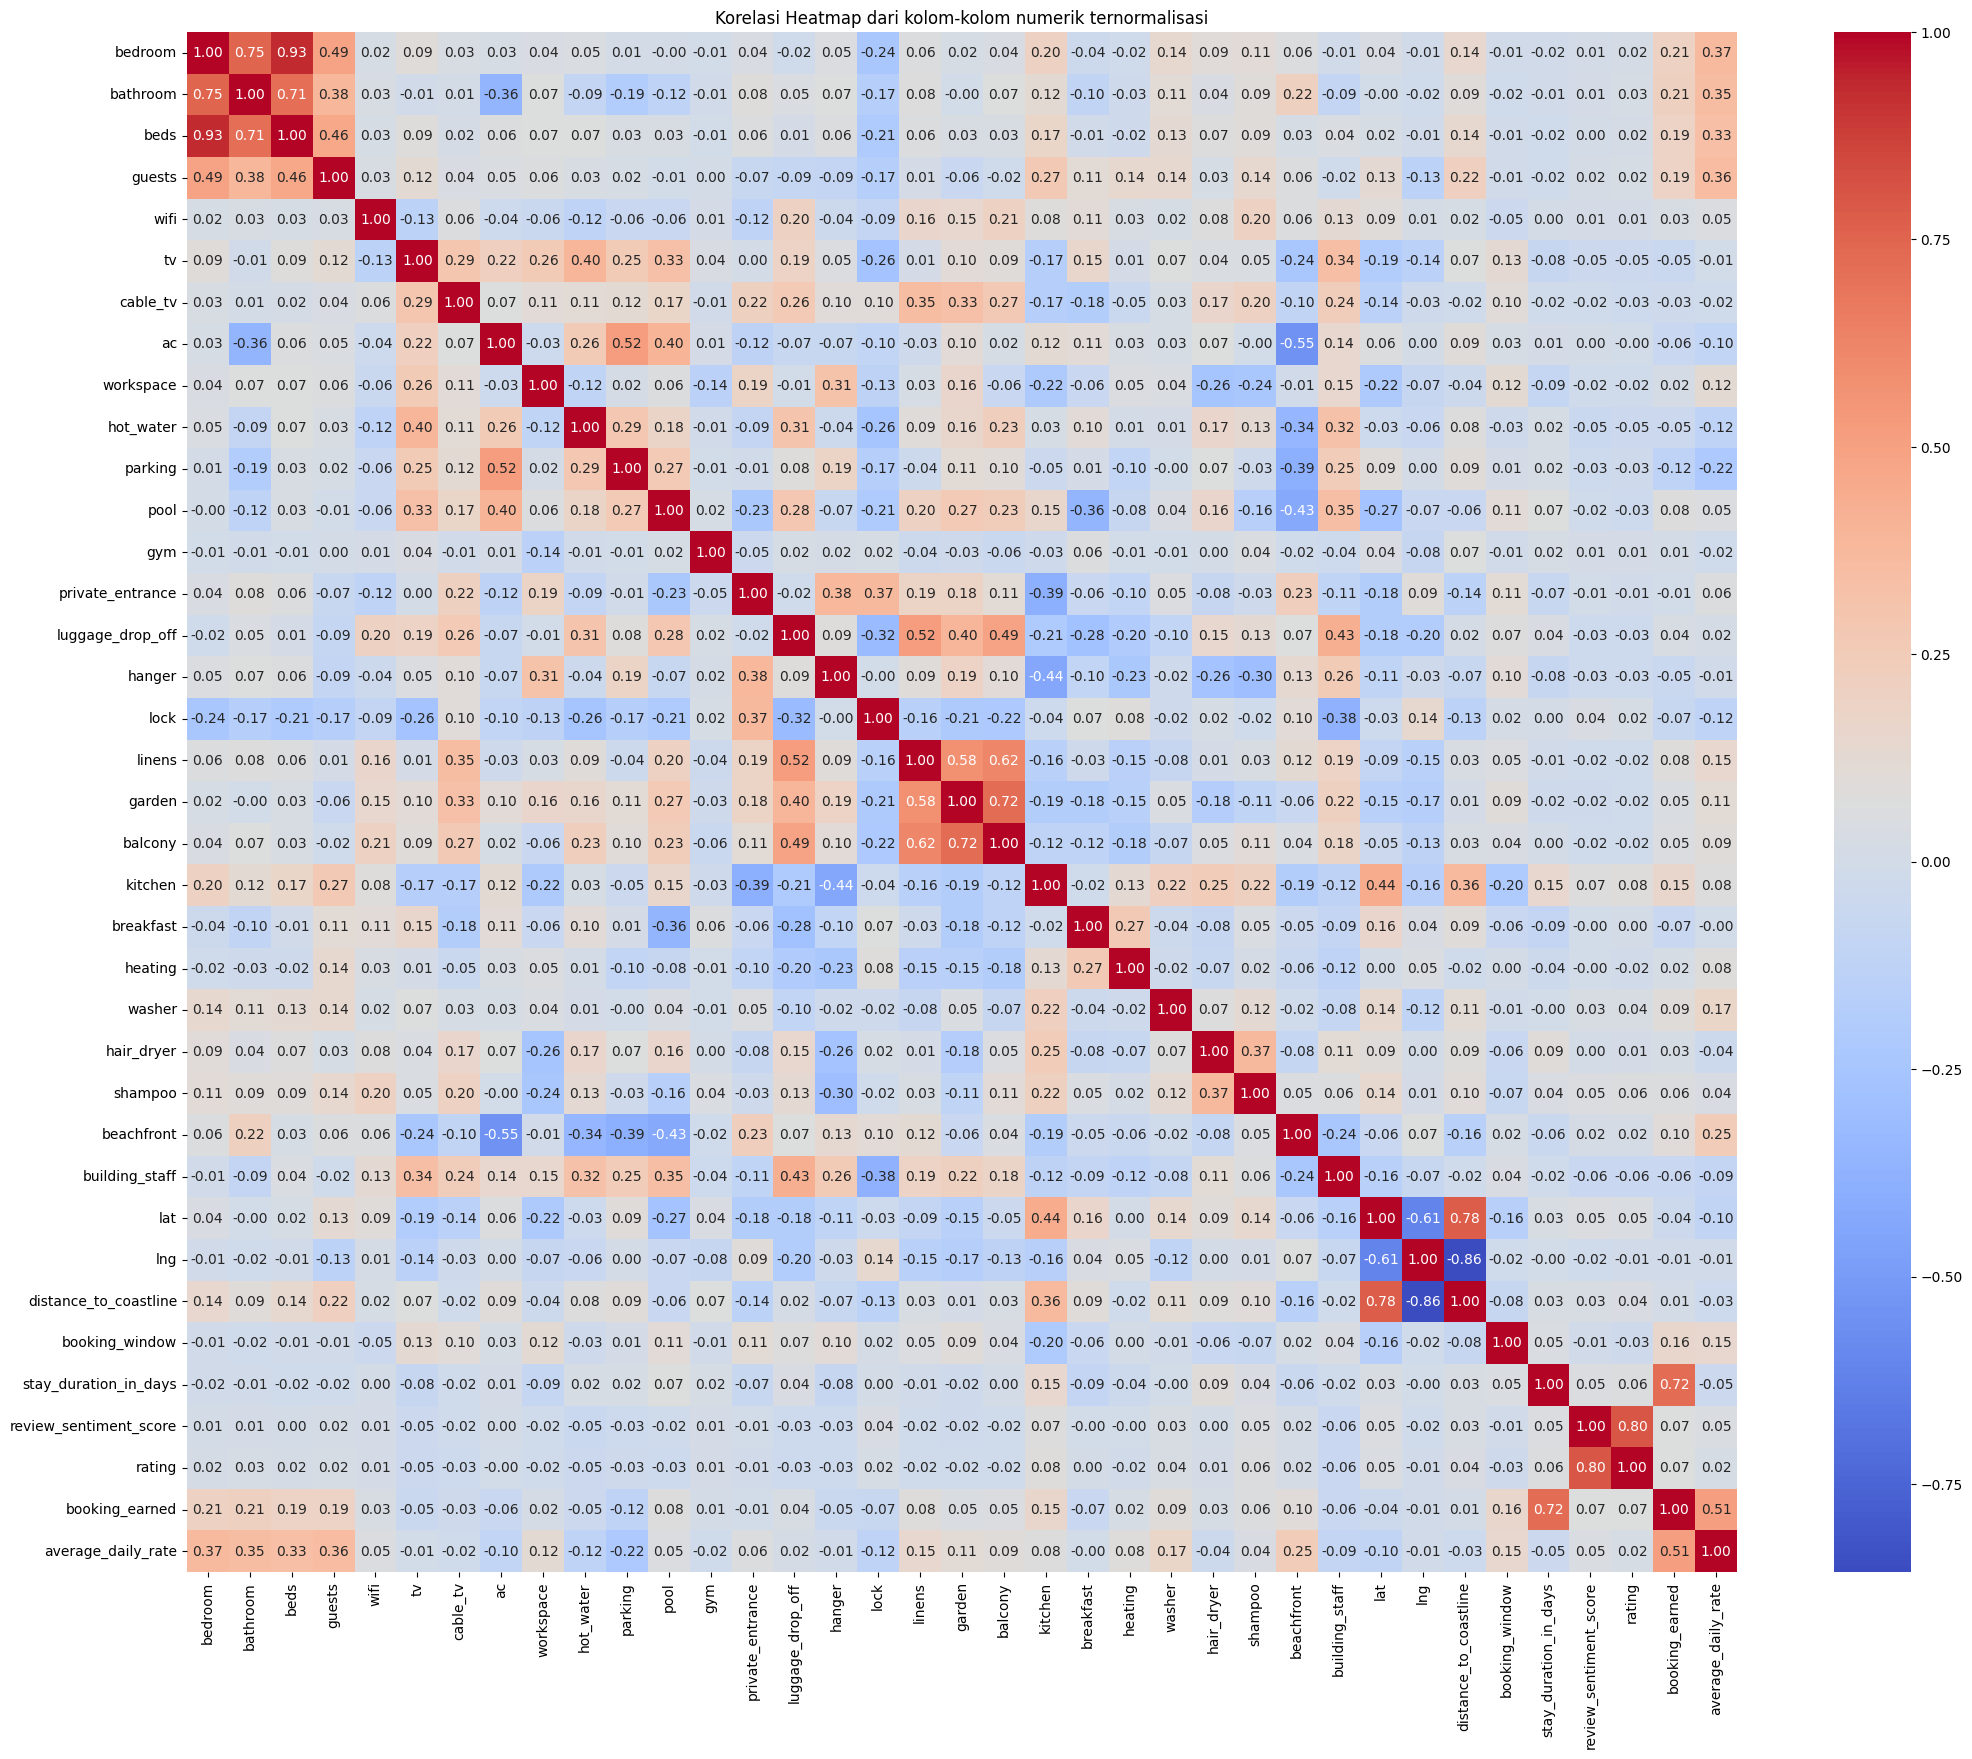

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

plt.figure(figsize=(25,20))
sns.heatmap(df_normalized.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik ternormalisasi')
plt.show()

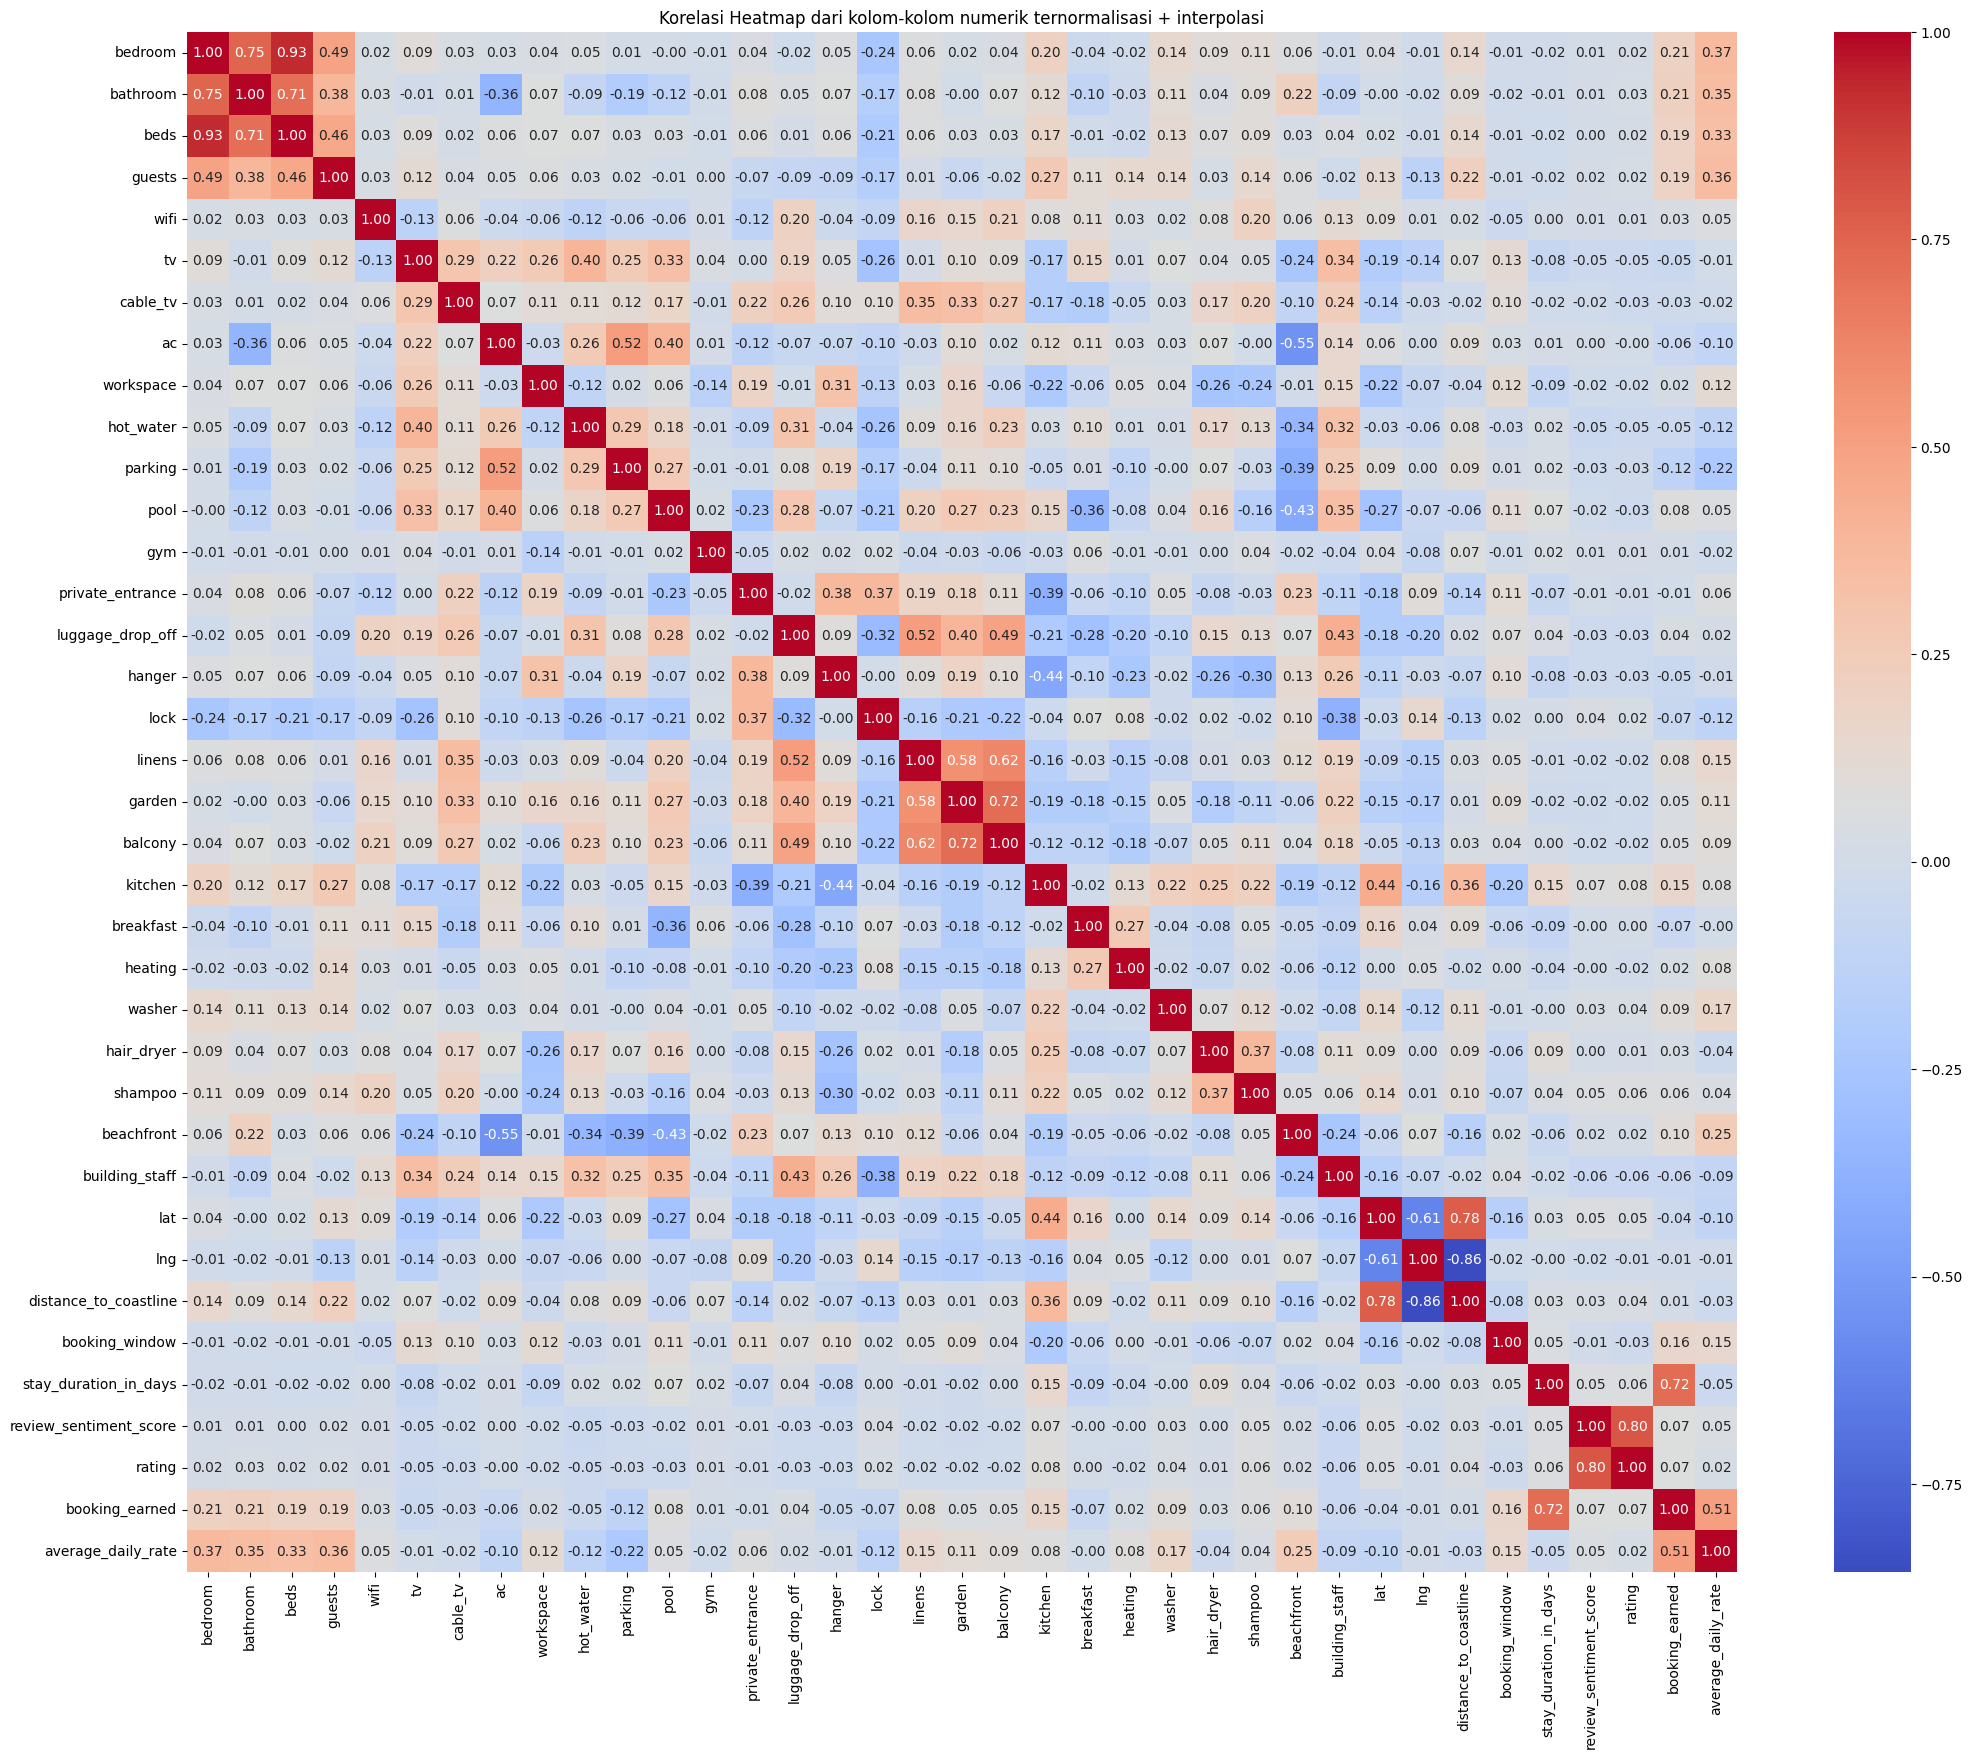

In [38]:
df_normalized_interpolated = pd.DataFrame(scaler.fit_transform(df_interpolated), columns=numeric_columns.columns)

plt.figure(figsize=(25,20))
sns.heatmap(df_normalized_interpolated.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik ternormalisasi + interpolasi')
plt.show()